In [31]:
! pip install jieba wordcloud matplotlib
! pip install textblob

In [32]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
headers={"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
#設置網站
url = 'https://news.ltn.com.tw/list/breakingnews/world'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
# 提取 h2 标签中的 title 属性值
titles = soup.find_all("h3")
# 將 ResultSet 轉換為字符
text = "\n".join([title.get_text() for title in titles])

In [34]:
# 定义需要删除的连接词列表
stopwords = r"的|了|和|是|就|也|歲|等|因|上|對|遭|向"
# 清理文本
cleaned_text = re.sub(r'[A-Za-z!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)
# 去除停用詞
cleaned_text = re.sub(stopwords, '', cleaned_text)
# 去除數字
cleaned_text = re.sub(r'\d+', '', cleaned_text)
# 去除空白字符
cleaned_text = re.sub(r'\s+', '', cleaned_text)

In [35]:
# 使用 jieba 进行中文分词
seg_list = jieba.cut(cleaned_text, cut_all=False)
words = list(seg_list)
filtered_words = [word for word in words if re.match('[\u4e00-\u9fa50-9]+', word)]
# 統計詞頻
word_freq = Counter(filtered_words)

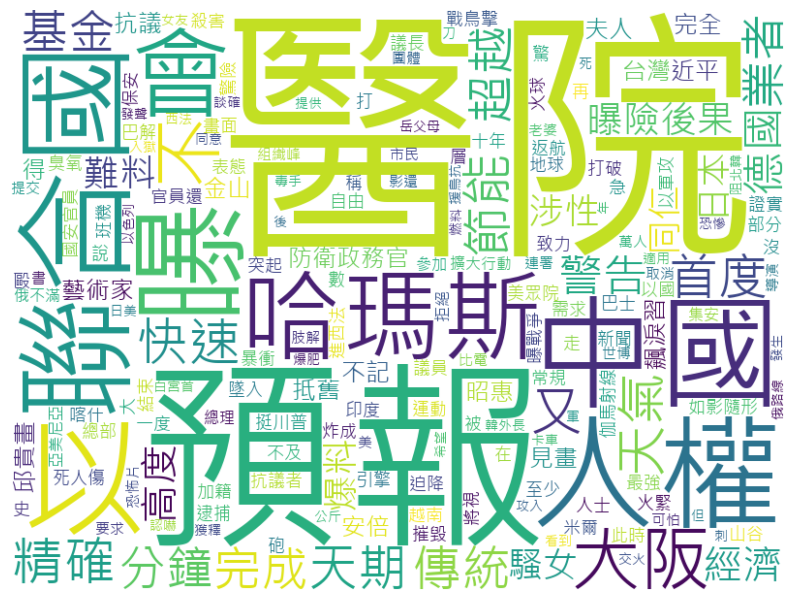

In [36]:
# 设置字体路径
font_path = "c:\Windows\Fonts\msjh.ttc"

# 创建 WordCloud 对象
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    width=800,
    height=600
)

# 生成词云图像
wordcloud = wc.generate_from_frequencies(word_freq)

# 显示词云
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
# 存檔
wordcloud.to_file("wordcloud.png")